In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from tensorflow import keras        
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alien-vs-predator-images/data/validation/predator/27.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/64.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/6.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/22.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/38.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/51.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/81.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/79.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/16.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/77.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/45.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/85.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/30.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/19.jpg
/kaggle

In [2]:
train_augmentation = ImageDataGenerator(zoom_range=0.3,
                                 rotation_range=20,
                                 featurewise_center=True,
                                 brightness_range=[0.7,1.7],
                                 horizontal_flip=True,
                                 rescale=1/255)

valid_augmentation = ImageDataGenerator(rescale=1/255)

In [3]:
train_gen = train_augmentation.flow_from_directory('/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train',
                                        class_mode='binary',
                                        color_mode='rgb',
                                        target_size = (256,256),
                                        batch_size=32)

Found 694 images belonging to 2 classes.


In [4]:
valid_gen = valid_augmentation.flow_from_directory('/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation',
                                                class_mode='binary',
                                                color_mode='rgb',
                                                target_size = (256,256),
                                                batch_size=32)

Found 200 images belonging to 2 classes.


 # The technique was used consists of 3 parts
    1. First convolutional layer kernel is larger that others. Usually 3x3 kernels perform better that 5x5, but if 5x5 kernel goes first it can reduce spatial dimension of an image. Moreover, it will not lose to much valuable information.
     2.Convolutional layer follows by Max Pooling.This structure is typical
     3 Number of filters grows as we go deeper. It was made to catch low-level features
    Also, because of pooling layer divided spatial dimension by 2, there was not exploding of parametres

In [5]:
baseline_model = keras.models.Sequential([
    keras.layers.Conv2D(64,5,input_shape=(256,256,3),padding="same",
                       activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,activation="relu",padding="same"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,activation="relu",padding="same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [6]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       7

In [7]:
baseline_model.compile(optimizer='rmsprop',
                      loss="binary_crossentropy",
                      metrics = 'accuracy')

history = baseline_model.fit_generator(train_gen,
                                      validation_data=valid_gen,
                                      epochs=20)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
22/22 [==============================] - 17s 779ms/step - loss: 0.8732 - accuracy: 0.5014 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/20
22/22 [==============================] - 14s 647ms/step - loss: 0.6997 - accuracy: 0.4928 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/20
22/22 [==============================] - 16s 749ms/step - loss: 0.6987 - accuracy: 0.5202 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 4/20
22/22 [==============================] - 14s 645ms/step - loss: 0.8396 - accuracy: 0.5245 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 5/20
22/22 [==============================] - 15s 700ms/step - loss: 0.6935 - accuracy: 0.5187 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
22/22 [==============================] - 15s 687ms/step - loss: 0.8152 - accuracy: 0.5490 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 7/20
22/22 [==============================] - 15s 684ms/step - loss: 0.6889 - accuracy: 0.5778 - val_loss: 0.6561 - val_accuracy: 0.6250

# Learning Rate Scheduling
1-cycle LR scheduling method was introcuced in 2018 year paper.It Starts by increasing the initial LR linearly to some value duringthe first half of training. Next, it decrease it linearly as well during
the second half of training. Finally, in last few epochs it dropping rate down by several orders of magnitude linerally too

In this particual case it did not help to improve the perfomance but in general in larger datasets it helps.

In [8]:
lr_scheduling_optimizer = keras.optimizers.SGD(lr=0.01,decay=1e-4)

baseline_model.compile(optimizer=lr_scheduling_optimizer,
                       loss="binary_crossentropy",
                      metrics = 'accuracy')

history = baseline_model.fit_generator(train_gen,
                                      validation_data=valid_gen,
                                      epochs=20)

Epoch 1/20
22/22 [==============================] - 15s 696ms/step - loss: 0.4341 - accuracy: 0.8026 - val_loss: 0.5354 - val_accuracy: 0.7650
Epoch 2/20
22/22 [==============================] - 15s 703ms/step - loss: 0.4395 - accuracy: 0.7867 - val_loss: 0.5687 - val_accuracy: 0.7650
Epoch 3/20
22/22 [==============================] - 14s 659ms/step - loss: 0.4217 - accuracy: 0.7954 - val_loss: 0.5412 - val_accuracy: 0.7800
Epoch 4/20
22/22 [==============================] - 15s 685ms/step - loss: 0.3994 - accuracy: 0.8127 - val_loss: 0.5371 - val_accuracy: 0.7650
Epoch 5/20
22/22 [==============================] - 15s 685ms/step - loss: 0.4118 - accuracy: 0.8199 - val_loss: 0.5348 - val_accuracy: 0.7750
Epoch 6/20
22/22 [==============================] - 16s 721ms/step - loss: 0.3919 - accuracy: 0.8285 - val_loss: 0.5474 - val_accuracy: 0.7700
Epoch 7/20
22/22 [==============================] - 14s 649ms/step - loss: 0.3781 - accuracy: 0.8343 - val_loss: 0.5832 - val_accuracy: 0.7750

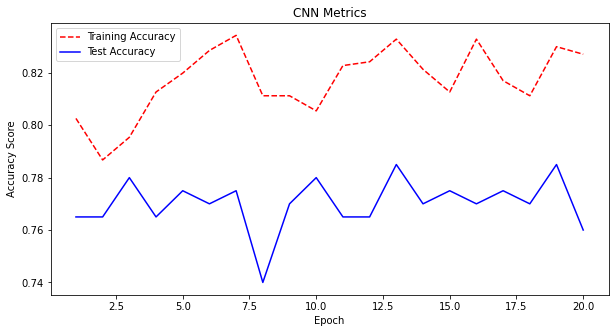

In [9]:
import matplotlib.pyplot as plt


training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(10,5))

plt.plot(range(1,21), training_accuracy, "r--")
plt.plot(range(1,21), test_accuracy, "b-")

plt.title("CNN Metrics")
plt.legend(["Training Accuracy", "Test Accuracy"]) 
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

# Transfer learning
For transfer learning as pretrained model I decided to use Xception model and added average pooling layer. 
Perfomance increased dramatically, as it was expected :) 

In [10]:
base = keras.applications.xception.Xception(weights="imagenet",
                                           include_top=False)

avg_pooling_layer = keras.layers.GlobalAveragePooling2D()(base.output)
outputs = keras.layers.Dense(1,activation="sigmoid")(avg_pooling_layer)
tranfer_model = keras.Model(inputs=base.input,outputs=outputs)

for layer in base.layers:
    layer.trainable=False
    
optimizer = keras.optimizers.SGD(lr=0.2,momentum=0.9,decay=0.01)

tranfer_model.compile(optimizer=optimizer,loss="binary_crossentropy",
                      metrics = 'accuracy')

history2 = tranfer_model.fit_generator(train_gen,
                                      validation_data=valid_gen,
                                      epochs=20)

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/20
22/22 [==============================] - 15s 696ms/step - loss: 0.5392 - accuracy: 0.8069 - val_loss: 0.4172 - val_accuracy: 0.8950
Epoch 2/20
22/22 [==============================] - 16s 714ms/step - loss: 0.3950 - accuracy: 0.8963 - val_loss: 0.3787 - val_accuracy: 0.9200
Epoch 3/20
22/22 [==============================] - 14s 655ms/step - loss: 0.1795 - accuracy: 0.9395 - val_loss: 0.3151 - val_accuracy: 0.8950
Epoch 4/20
22/22 [==============================] - 16s 747ms/step - loss: 0.1967 - accuracy: 0.9294 - val_loss: 0.3128 - val_accuracy: 0.8800
Epoch 5/20
22/22 [==============================] - 14s 653ms/step - loss: 0.1411 - accuracy: 0.9582 - val_loss: 0.3542 - val_accuracy: 0.8900
Epoch 6/20
22/22 [==============================] - 16s 717ms/step - loss: 0.1631 - accuracy: 0.9510 - val_loss: 0.2462 - val_accuracy: 0.9200
Epoch 7/20
22/22 [==============================] - 15s 681ms/step - loss: 0.

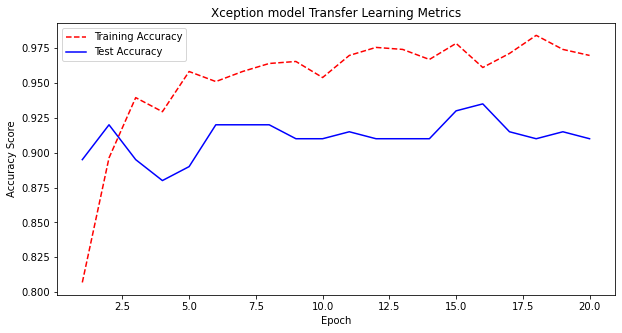

In [11]:
training_accuracy = history2.history["accuracy"]
test_accuracy = history2.history["val_accuracy"]

plt.figure(figsize=(10,5))

plt.plot(range(1,21), training_accuracy, "r--")
plt.plot(range(1,21), test_accuracy, "b-")

plt.title("Xception model Transfer Learning Metrics")
plt.legend(["Training Accuracy", "Test Accuracy"]) 
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();